<a href="https://colab.research.google.com/github/Cpicon/ProcesamientoImagenes/blob/master/Laboratorio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1.

In [4]:
# import all necesary libraries
import numpy as np
#import skimage.io as io
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
import requests
import cv2 
import os

In [2]:
# creat a variable that storaged the url of image
url = 'https://openai.com/content/images/2019/05/openai-twitter@2x.png'
#create a name to file
name = "./img/OpenaAi2.jpeg"
def get_img(url,name):   
    # make http request to get a stored image
    r = requests.get(url)
    # create a new file (instance) where the download image will be obtained
    with open(name,'wb') as f:
      # save the content of http request on the instance
      f.write(r.content)
get_img(url,name)

In [5]:
# show the path of the current working directory
print( os.getcwd() )
# list the file contained on the working directory
print( os.listdir() )

C:\Users\GABRIELA\Documents\ProcesamientoImagenes\Laboratorio1_Tomography
['.ipynb_checkpoints', 'Histogramas_Tomografia.pdf', 'img', 'Laboratorio1.ipynb']


In [4]:
# get the current directory
wd = os.getcwd()
wd

'C:\\Users\\GABRIELA\\Documents\\ProcesamientoImagenes'

C:\Users\GABRIELA\Documents\ProcesamientoImagenes\OpenaAi.jpeg
The type of data of the image is:  <class 'numpy.ndarray'>


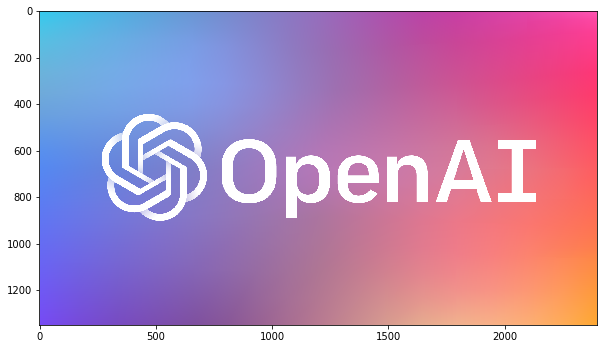

In [5]:
def read_img(name):
    try:
        # read the image with openCv
        img = cv2.imread(os.path.join(wd,name))
        print(os.path.join(wd,name))
        # convert BGR to RGB order
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # print the type of data of image
        print("The type of data of the image is: ", type(img))
        # create a figure with 10x10
        plt.figure(figsize=(10,10))
        # show the image
        plt.imshow(img)    
        return img
    except:
        raise NameError("The file {} doesn't exist".format(name))
        
img = read_img(name)

## What happens if you use the plt.plot command to display the image?

When trying to use `plt.plot ()` to display an image, the dimension error appears. That happens because the `plot` function expects two 1-D vectors each or 2-D matrix. You can check the documentation for this function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html) 

ValueError: x and y can be no greater than 2-D, but have shapes (1350,) and (1350, 2400, 3)

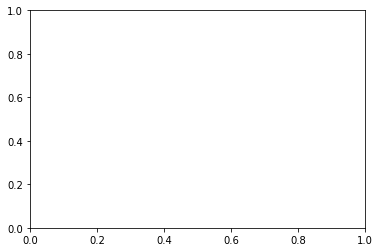

In [7]:
plt.close()
#Trying plot a 1D of the array image
plt.plot(img)

## How is represented an image on a computer?

An image is defined by a two-dimensional function $$f(x,y)$$ where x and y are spacial coordinates. The amplitud of f is called the intensity at any pair of coordinates [1]. So the image is represented by an array of two dimensions to grayscale image and an array of 3-D to color image. In python, the type of strucutre used to represent the image is numeric saved as numpy object named array. 

In [8]:
#print the size of color image
print('The image has {0} size and its class is {1}'.format(np.shape(img),type(img)))
print('The type is', img.dtype)

The image has (1350, 2400, 3) size and its class is <class 'numpy.ndarray'>
The type is uint8


## What is type of data?

Python has so many kinds of variables,  the type of data corresponding a specific way to save the information on memory. The most common are numerics and chain character. You can find far yet other types as boolean which means that you can save True or False and they are very used to save a conditional outcome or operators, you can more information [here](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html). For instance, the images are saved as an array of numeric values named uint8 that means it uses 8 bytes of memory space for each cell.

The image has (1350, 2400) size 


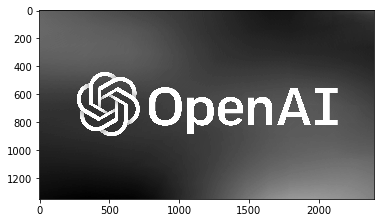

In [9]:
#convert the color image to gray image
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#print the size of gray image
print('The image has {0} size '.format(np.shape(gray)))
# shoy the grayscale image
plt.imshow(gray, cmap='gray')

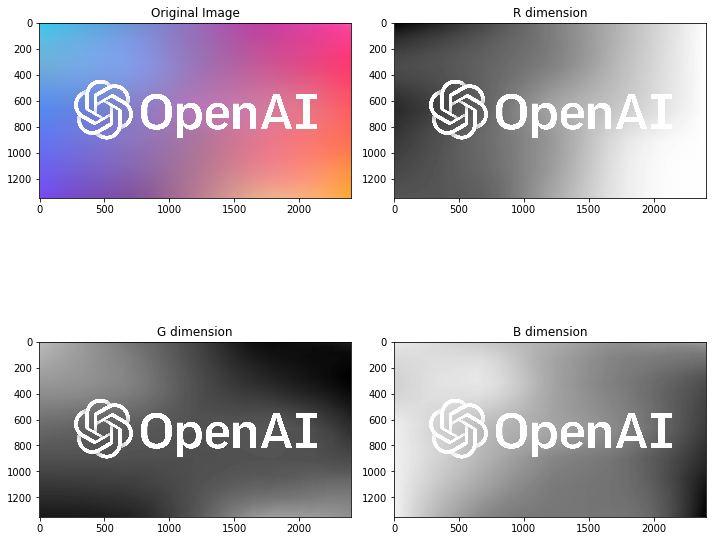

In [10]:
plt.figure(figsize=(10,10))
#create a subplot figure with 2x2. Activate the first one
plt.subplot(2,2,1)
#show the original image
plt.imshow(img)
#put a title
plt.title('Original Image')
#Activate the second one
plt.subplot(2,2,2)
#show the R dimension image
plt.imshow(img[:,:,0], cmap='gray')
plt.title('R dimension')
#Activate the third one
plt.subplot(2,2,3)
#show the G dimension image
plt.imshow(img[:,:,1], cmap='gray')
plt.title('G dimension')
#Activate the fourth one
plt.subplot(2,2,4)
#show the B dimension image
plt.imshow(img[:,:,2], cmap='gray')
plt.title('B dimension')
# Adjust the space betweens plots
plt.tight_layout()
plt.savefig('Channels.jpeg')

## Types of Images Compressions

The are several ways to save the image information. But, commonly, they have to be compressed in order to reduce the memory space used. To refer which algorithm of compression will be used, you must to add the extension on the final part in the file name. These extensions can be jpeg, png, tiff or Dicom format. Basically, there are two types to compress the information. Compression can be lossy or lossless. Lossless is a type of algorithm that remains the picture quality and the file can be decompressed to its original quality. On the other hand, lossy removes data definitively [2].

**PNG** is a lossless compression type. It is a type of image that is separated by layers, thus the user can get specific layers or modified the file. It is of high quality [2].

**JPEG**  has a fairly small file size for the quality that it displays. JPEG is a lossy format that offers a higher compression rate than PNG in the trade-off for quality [2].

**TIFF** is a type of compressed format to handling images and data within a single file. The ability to store image data in a lossless format makes a TIFF file a useful image archive, because, unlike standard JPEG files, a TIFF file using lossless compression (or none) may be edited and re-saved without losing image quality [3].

**DICOM (Digital Imaging and Communications in Medicine)** is a standard for handling, storing, printing, and transmitting information in medical imaging. It allows stablish network communications protocol among entities that can read, accept this protocols such as medical devices [4]. 

## What is an Histogram Image?

An image histogram acts as a representation of the intensity in a digital image. It counts the pixels for each value. There are 256 different possible intensities for an 8-bit grayscale image. It showing the distribution of pixels amongst those grayscale values. Histograms can also be taken of color images count each space separately and plot it a single figure [5]. 

In [33]:
# vectorizing tha array original image to 1-D vector
flatten_img = img.ravel()

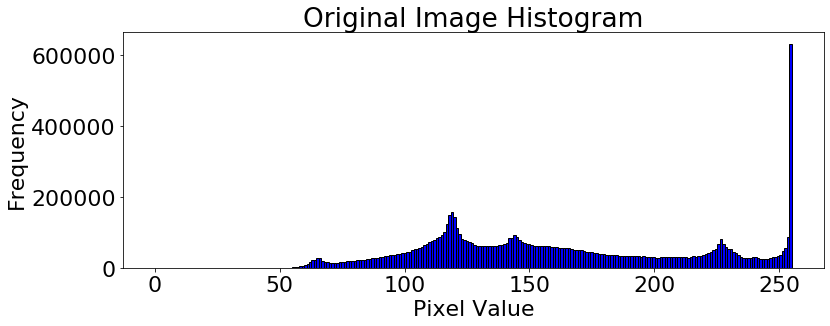

In [36]:
plt.figure(figsize=(12,5))
plt.hist(flatten_img, bins=256, range=(0,255), fc='b', ec='k')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('histColor.jpeg')

## It's better hist.... each channel separatedly

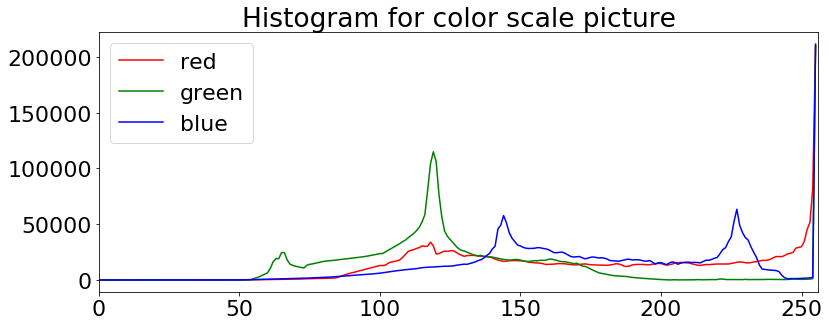

In [39]:
#create a list
color = ('r','g','b')
plt.figure(figsize=(12,5))
for channel,col in enumerate(color):
    #get the correspon histogram for each channel on the image
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.legend(['red','green','blue'], loc='upper left')
plt.tight_layout()
plt.savefig('histColorCorrect.jpeg')
plt.show()


## Histogram to a grayscale image

The function that convert the RGB image to grayscale image used here is `cv2.cvtColor([img], cv2.COLOR_RGB2GRAY)` that receive as parameter the image and the converting. In this case, this function calculates the weighted average of each dimensional pixel overlapped following the next function:   
$$\text{RGB[A] to Gray:} \quad Y \leftarrow 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B$$ [6].

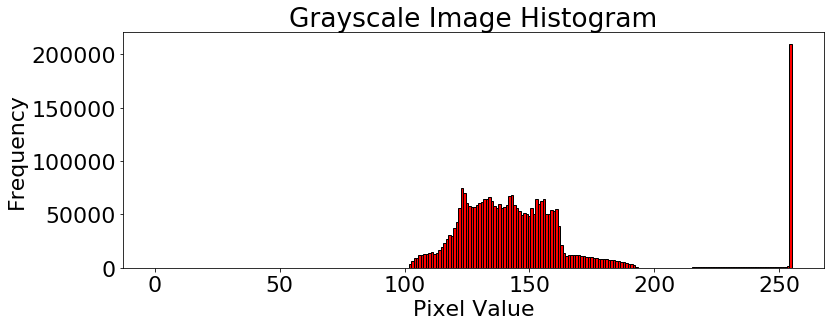

In [40]:
# vectorizing tha array original image to 1-D vector
flatten_img_gray = gray.ravel()
#show the hist
plt.figure(figsize=(12,5))
plt.hist(flatten_img_gray, bins=256, range=(0,255), fc='r', ec='k')
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('histGray.jpeg')

## PART 2

C:\Users\GABRIELA\Documents\ProcesamientoImagenes\acv.jpg
The type of data of the image is:  <class 'numpy.ndarray'>


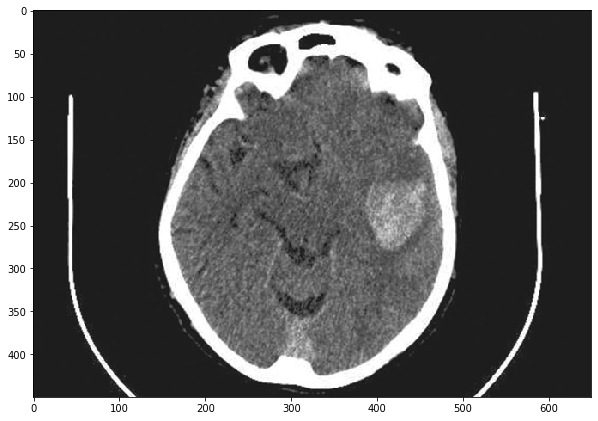

In [15]:
url = 'https://3pw8zx30ta4c3jegjv14ssuv-wpengine.netdna-ssl.com/wp-content/uploads/sites/2/2017/06/17-NEU-902-Bain-650x450.jpg'
name = "acv.jpg"
# getting and downloading the image
get_img(url,name)
# reading and visualizing the image
acv =read_img(name)



In [16]:
print('The image has {0} size '.format(np.shape(acv)))

The image has (450, 650, 3) size 


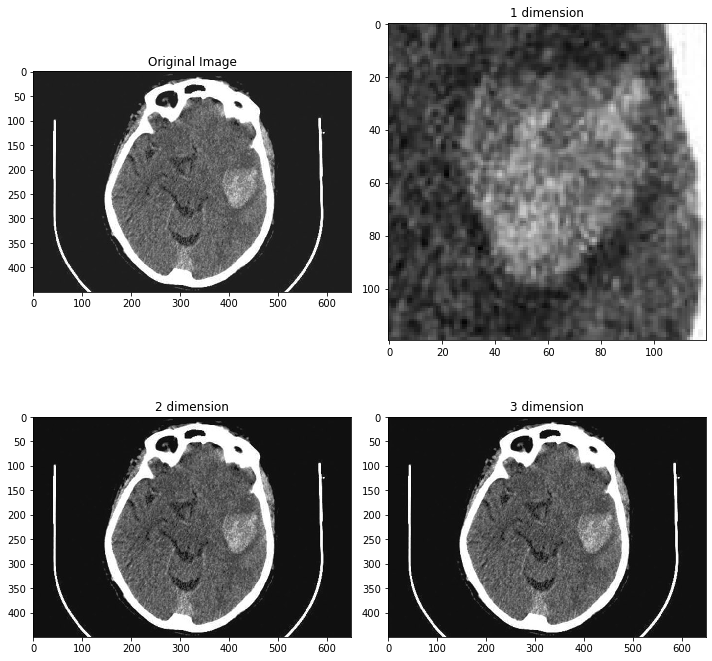

In [17]:
plt.figure(figsize=(10,10))
#create a subplot figure with 2x2. Activate the first one
plt.subplot(2,2,1)
#show the original image
plt.imshow(acv)
#put a title
plt.title('Original Image')
#Activate the second one
plt.subplot(2,2,2)
#show the R dimension image
plt.imshow(acv[180:300,360:480,0], cmap='gray')
plt.title('1 dimension')
#Activate the third one
plt.subplot(2,2,3)
#show the G dimension image
plt.imshow(acv[:,:,1], cmap='gray')
plt.title('2 dimension')
#Activate the fourth one
plt.subplot(2,2,4)
#show the B dimension image
plt.imshow(acv[:,:,2], cmap='gray')
plt.title('3 dimension')
# Adjust the space betweens plots
plt.tight_layout()
plt.savefig('acvChannels.jpeg')

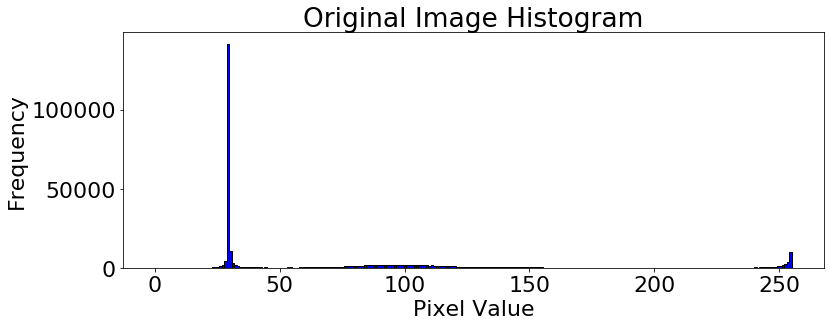

In [44]:
flatten_img = acv[:,:,0].ravel()
plt.figure(figsize=(12,5))
plt.hist(flatten_img, bins=256, range=(0,255), fc='b', ec='k')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('AcvHistMax.jpeg')

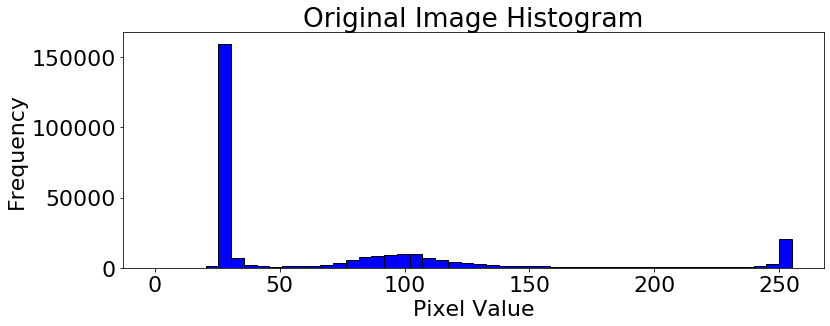

In [45]:
plt.figure(figsize=(12,5))
plt.hist(flatten_img, bins=50, range=(0,255), fc='b', ec='k')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('AcvHistMin.jpeg')

As the maximum number of bins is set, the bars are thicker.

In [20]:
def region_of_interest(img, vertices):
    """Applies an image mask
    
    Only keeps the region of the image defined by th epolygon formed
    from ´vertices´. The rest of the image is set to black. 
    ´vertices´ should be a numpe array of integer points"""
    # defining a blank mask to start with
    mask = np.zeros_like(img)
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape)>2 :
        channel_count = img.shape[2]
        ignore_mask_color = (255,)*channel_count
    else:
        ignore_mask_color = 255    
    #filling pixels inside the polygon defined by ¨vertices¨ with the fill color
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

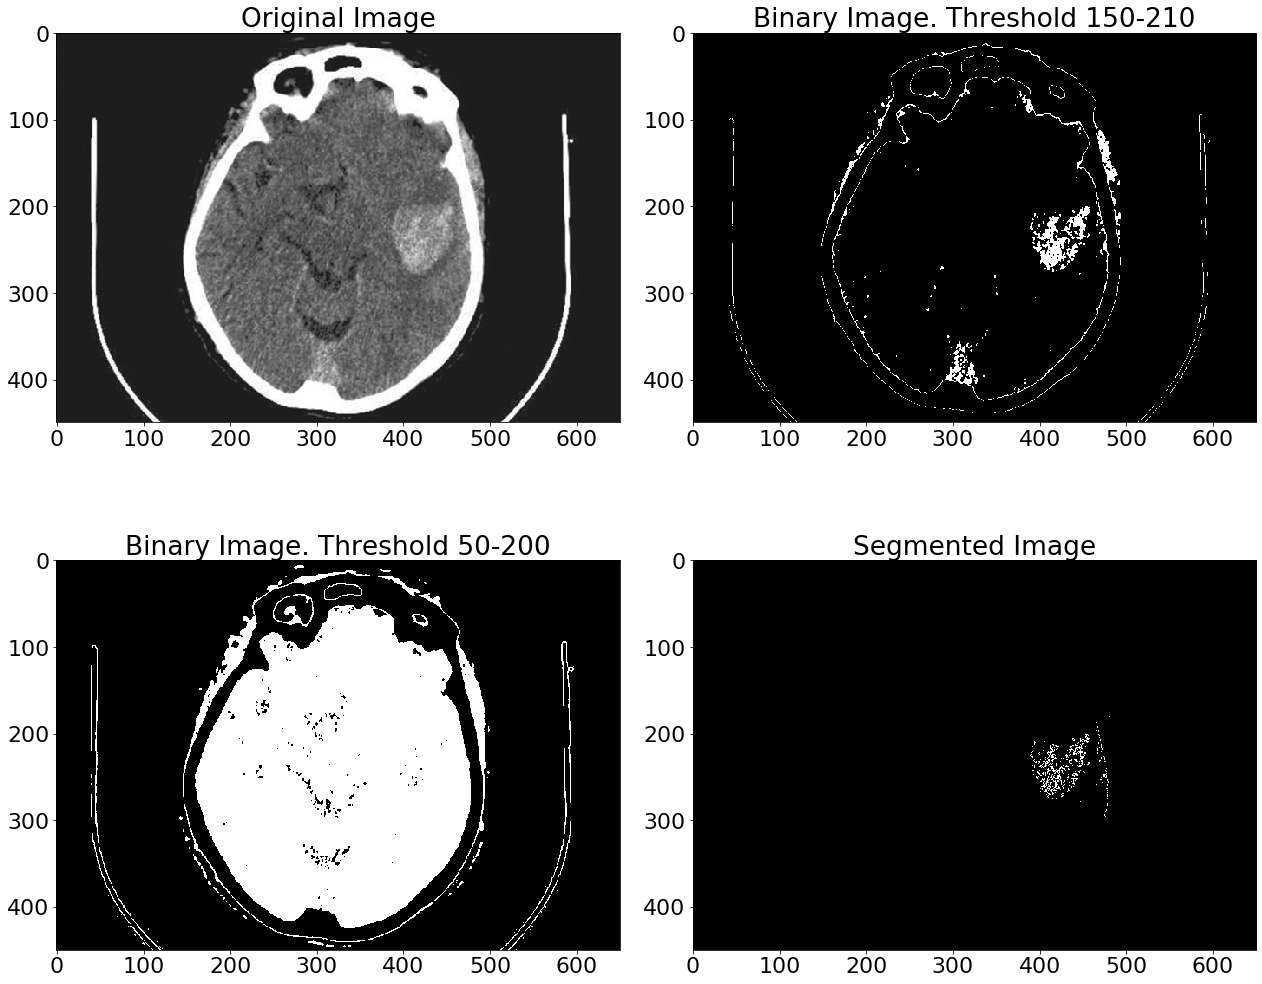

In [43]:
# reduce noise
cv2.GaussianBlur(acv, (3,3), 0)
#copy the img to make the mask1
mask1 = np.zeros_like(acv[:,:,0])
#aplly threshold  image
mask1[(acv[:,:,0]>=150) & (acv[:,:,0]<=210)] = 1
#copy the img to make the mask1
mask2 = np.zeros_like(acv[:,:,0])
#aplly threshold  image
mask2[(acv[:,:,0]>=50) & (acv[:,:,0]<=200)] = 1
#define the area of interest
vertices = np.array([[(360, 300),(360,180), (480, 180), (480, 300)]], dtype=np.int32)
masked1 = region_of_interest(acv[:,:,0], vertices)


plt.figure(figsize=(18,15))
#create a subplot figure with 1x3. Activate the first one
plt.subplot(2,2,1)
#show the original image
plt.title("Original Image")
plt.imshow(acv)
plt.subplot(2,2,2)
plt.imshow(mask1,cmap='gray')
plt.title("Binary Image. Threshold 150-210")
plt.subplot(2,2,3)
plt.imshow(mask2,cmap='gray')
plt.title("Binary Image. Threshold 50-200")
plt.subplot(2,2,4)
#returning the image only where mask pixels are nonzero
masked_image = cv2.bitwise_and(masked1, mask)
plt.imshow(masked_image, cmap='gray')
plt.title("Segmented Image")
plt.tight_layout()
plt.savefig('AcvSegmented.jpeg')

## PART 3

In [22]:
import glob
import pydicom as pdm

40
Image size.......: 512 x 512, 524288 bytes
Slice Thickness: 3.200000
Pixel Spacing (row, col): (0.693359, 0.693359) 
 This means the image has 3.2 mm slices, and each voxel represents 0.693359375 mm.


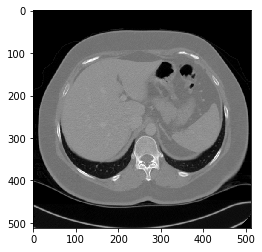

In [23]:
# test in one image
test = pdm.dcmread(glob.glob(os.path.join('mixed_slices', '*.dcm'))[100])
#get the rows number of the image
rows = int(test.Rows)
#get the cols number of the image
cols = int(test.Columns)
#get the number of the image
print(test.InstanceNumber)
print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(rows=rows, cols=cols, size=len(test.PixelData)))
#visualize the image
plt.imshow(test.pixel_array,vmin=0, vmax=2000,cmap='gray') 

print("Slice Thickness: %f" % test.SliceThickness)
print("Pixel Spacing (row, col): (%f, %f) " % (test.PixelSpacing[0],test.PixelSpacing[1]))
print(" This means the image has {0} mm slices, and each voxel represents {1} mm.".format(test.SliceThickness,test.PixelSpacing[0]))

In [24]:
vol1 = np.zeros((rows, cols, 123)) # Patient 8
vol2 = np.zeros((rows, cols, 110)) # Patient 10
vol3 = np.zeros((rows, cols, 114)) # Patient 26

In [25]:
#CHAOS^CT_SET_26
#CHAOS^CT_SET_8
#CHAOS^CT_SET_10
data = glob.glob(os.path.join('mixed_slices', '*.dcm'))
for i in data:
    x = pdm.dcmread(i)
    # separate the image according with the name patient
    if x.PatientName == 'CHAOS^CT_SET_8':
        vol1[:,:,x.InstanceNumber-1] = x.pixel_array
    elif x.PatientName == 'CHAOS^CT_SET_10':
        vol2[:,:,x.InstanceNumber-1] = x.pixel_array
    else:
        vol3[:,:,x.InstanceNumber-1] = x.pixel_array


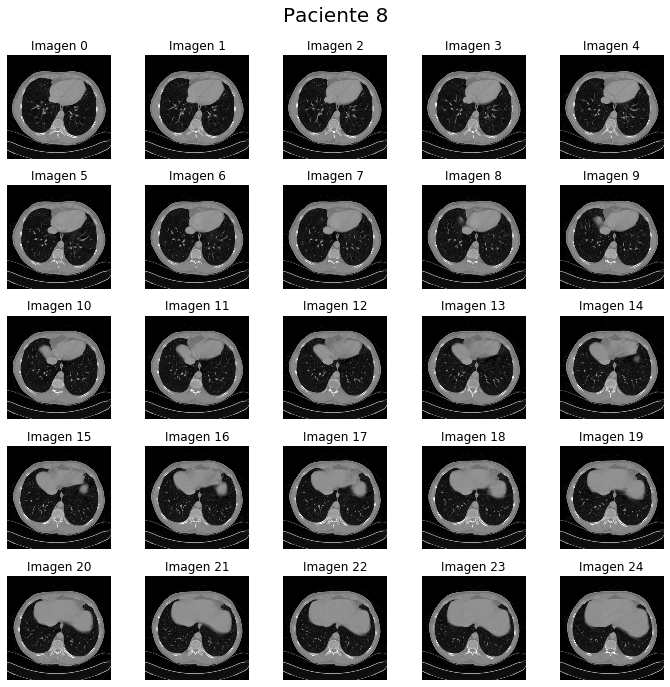

In [84]:
#visualizacion paciente 8
fig = plt.figure(figsize=(10,10))
fig.suptitle('Paciente 8', fontsize=20) 
fig.subplots_adjust(hspace=0.5)
for idx, num in enumerate(range(123)):
    ax = fig.add_subplot(5,5,num +1)
    ax.imshow(vol1[:,:,idx],vmin=0, vmax=2000,cmap='gray')
    title = 'Imagen {}'.format(num)
    ax.set_title(title)
    ax.axis('off')
    if idx == 24:
        break
    #plt.draw ()
    #plt.pause(0.001)
    #plt.clf()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('paciente8ACV')
plt.show()

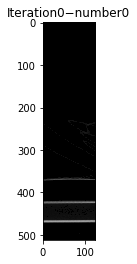

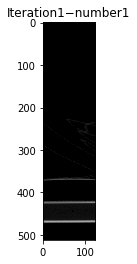

In [27]:
plt.ion()
plt.show()
for idx, num in enumerate(range(123)):
    plt.imshow(vol1[:,idx,:],vmin=0, vmax=2000,cmap='gray')
    plt.title('Iteration{0}−number{1}'.format(idx,num))
    if idx == 1:
        break
    plt.draw ()
    plt.pause(0.001)
    plt.clf()

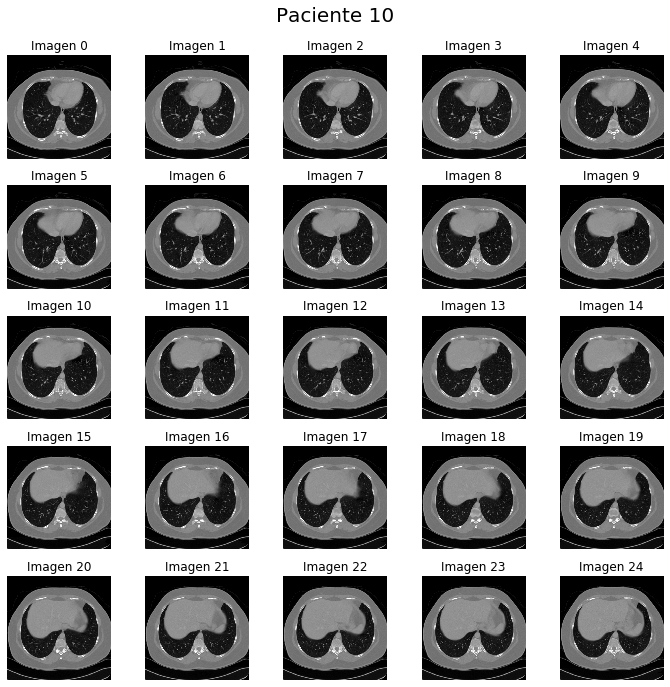

In [87]:
#visualizacion paciente 10
fig = plt.figure(figsize=(10,10))
fig.suptitle('Paciente 10', fontsize=20) 
fig.subplots_adjust(hspace=0.5)
for idx, num in enumerate(range(110)):
    ax = fig.add_subplot(5,5,num +1)
    ax.imshow(vol2[:,:,idx],vmin=0, vmax=2000,cmap='gray')
    title = 'Imagen {}'.format(num)
    ax.set_title(title)
    ax.axis('off')
    if idx == 24:
        break
    #plt.draw ()
    #plt.pause(0.001)
    #plt.clf()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('paciente10ACV')
plt.show()

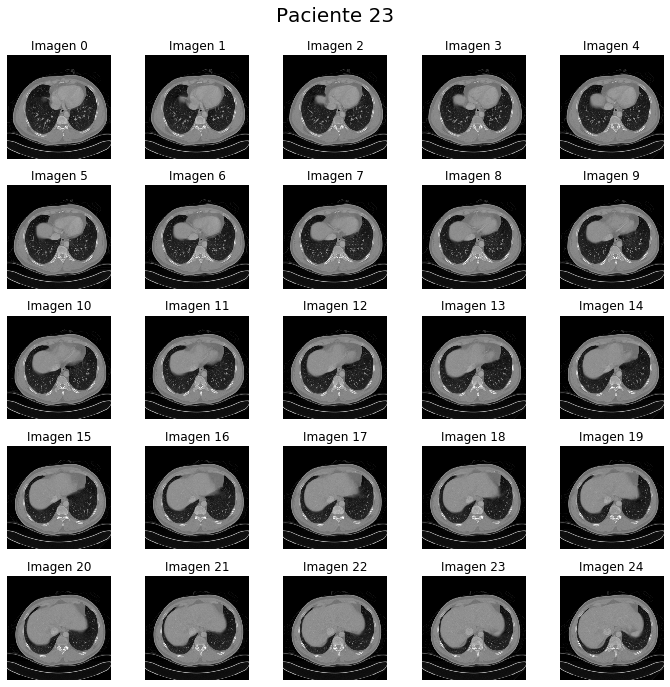

In [86]:
#visualizacion paciente 23
fig = plt.figure(figsize=(10,10))
fig.suptitle('Paciente 23', fontsize=20) 
fig.subplots_adjust(hspace=0.5)
for idx, num in enumerate(range(114)):
    ax = fig.add_subplot(5,5,num +1)
    ax.imshow(vol3[:,:,idx],vmin=0, vmax=2000,cmap='gray')
    title = 'Imagen {}'.format(num)
    ax.set_title(title)
    ax.axis('off')
    if idx == 24:
        break
    #plt.draw ()
    #plt.pause(0.001)
    #plt.clf()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('paciente23ACV')
plt.show()

## References:

    [1] R. C. Gonzalez and R. E. Woods, Digital image processing, 3rd ed. New York, NY: Pearson, 2008.
    
    [2] “Encoding images - Revision 4 - GCSE Computer Science - BBC Bitesize,” BBC News. [Online]. Available: https://www.bbc.co.uk/bitesize/guides/zqyrq6f/revision/4. [Accessed: 18-Aug-2019].
    
    [3] “TIFF File Format Summary,” TIFF: Summary from the Encyclopedia of Graphics File Formats. [Online]. Available: https://www.fileformat.info/format/tiff/egff.htm. [Accessed: 18-Aug-2019].
    
    [4] Softneta, “DICOM Library - About DICOM format,” DICOMLibrary. [Online]. Available: https://www.dicomlibrary.com/dicom/. [Accessed: 18-Aug-2019].
    
    [5] Informatics departament, “Intensity Histogram,” Image Analysis - Intensity Histogram. [Online]. Available: https://homepages.inf.ed.ac.uk/rbf/HIPR2/histgram.htm. [Accessed: 18-Aug-2019].
    
    [6] “Color conversions,” OpenCV. [Online]. Available: https://docs.opencv.org/3.1.0/de/d25/imgproc_color_conversions.html. [Accessed: 18-Aug-2019].